<a href="https://colab.research.google.com/github/TaiwoAjueyisi/Prodigy_WD_01/blob/main/train_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd


In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
#setting visualization styles
sns.set(style="whitegrid")

In [14]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


#connect to data
df = pd.read_csv('train.CSV')

In [15]:
#connect to data
df = pd.read_csv('train.csv')

In [ ]:
#reflect the first few column of the dataset
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#checking the shape of the dataset
print(f"The dataset contain {df.shape[0]} rows and {df.shape[1]} columns")

The dataset contain 891 rows and 12 columns


In [ ]:
#display the data type of each column
print("\nData type of each column:")
df.dtypes


Data type of each column:


,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [ ]:
#Getting the summary of dataset using descriptive statistics
print("\nSummary of dataset:")
print(df.describe().T)


Summary of dataset:
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  


In [ ]:
#identifying categorical and numerical variables

categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)


Categorical Variables: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Variables: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
# Dropping unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few columns to confirm changes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
numerical_vars

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Text(0, 0.5, 'Count')

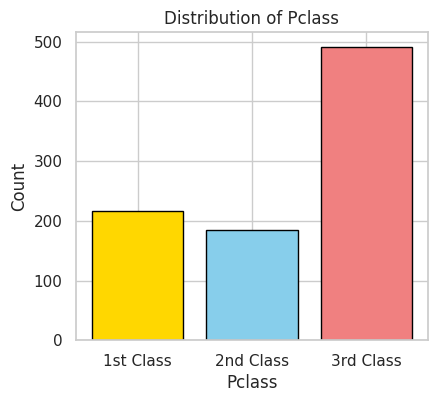

In [ ]:
# Plot for Survived using separate bar colors

# Create figure
plt.figure(figsize=(10, 4))

# --- Pclass Plot ---
plt.subplot(1, 2, 1)

# Count values
pclass_counts = df['Pclass'].value_counts().sort_index()
# Define colors for Pclass: 1st, 2nd, 3rd
pclass_colors = ['gold', 'skyblue', 'lightcoral']

# Bar plot
plt.bar(pclass_counts.index, pclass_counts.values, color=pclass_colors, edgecolor='black', width=0.8)
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')



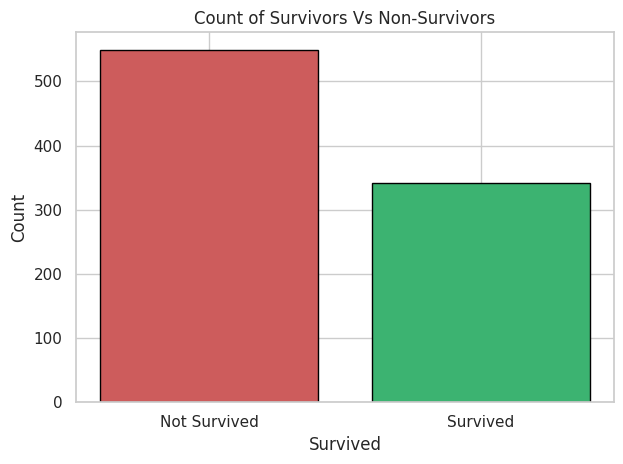

In [ ]:
# Survive univariant analysis
# Count values
survival_counts = df['Survived'].dropna().value_counts().sort_index()
# Define colors for 0 and 1
colors = ['indianred', 'mediumseagreen']

# Bar plot
plt.bar(survival_counts.index, survival_counts.values, color=colors, edgecolor='black', width=0.8,)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Count of Survivors Vs Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

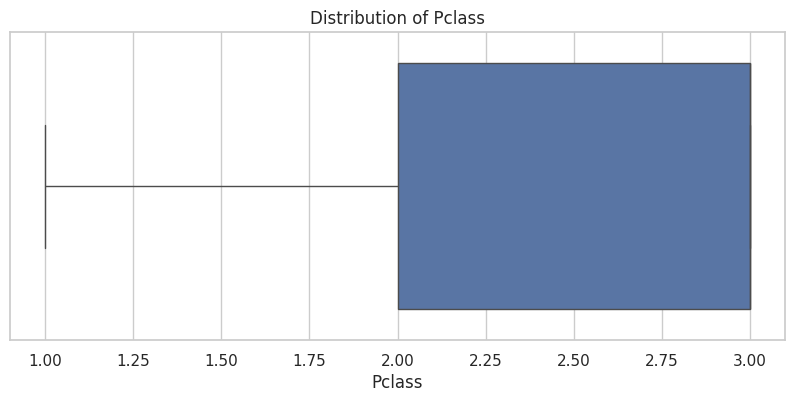

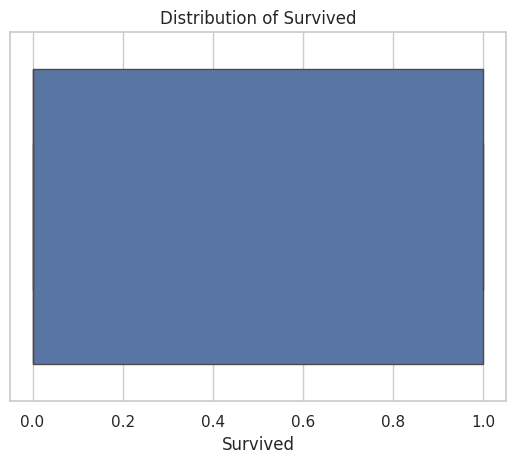

In [ ]:
#  box Most passengers are clustered in 2nd and 3rd class, with fewer in 1st class. Since Pclass is a categorical variable (1, 2, 3),
plt.figure(figsize=(10, 4))
for var in ['Pclass', 'Survived']:
    sns.boxplot(x=df[var].dropna())
    plt.title(f'Distribution of {var}')
    plt.show()


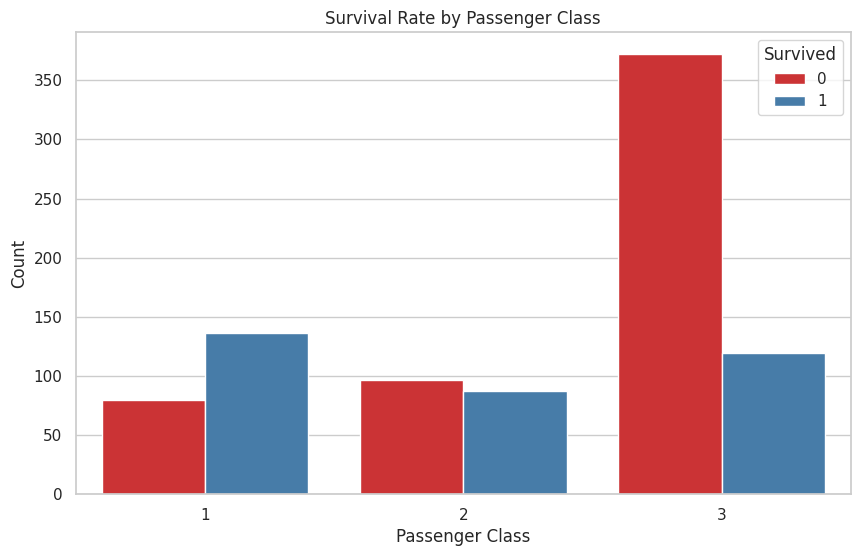

In [ ]:
# Bivariant analysis: survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Text(0, 0.5, 'Density')

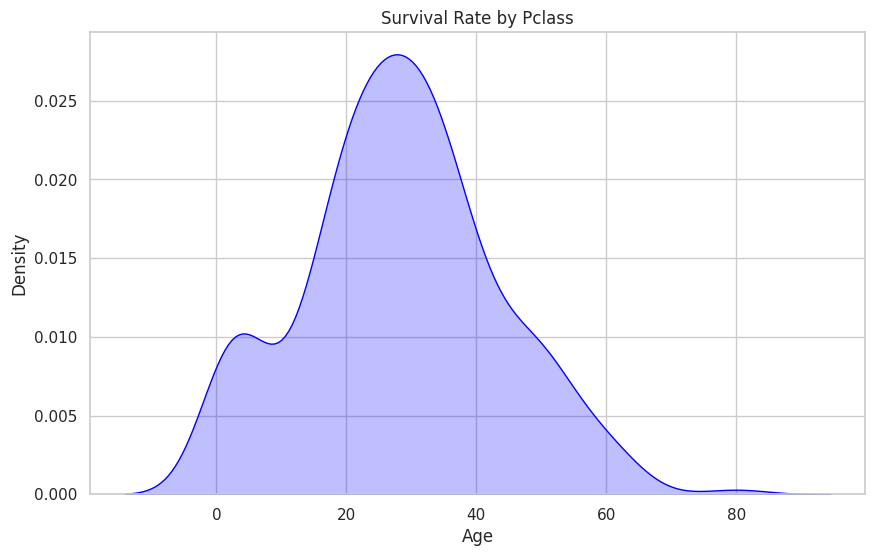

In [16]:
# Bivariant analysis: survival rate by passenger class kde plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), fill=True, label='Survived', color='blue')
plt.title('Survival Rate by Pclass')
plt.xlabel('Age')
plt.ylabel('Density')
